# DATA 624 Home Work 2 - Python 

## Problem 7.2

SVR Train RMSE: 2.40


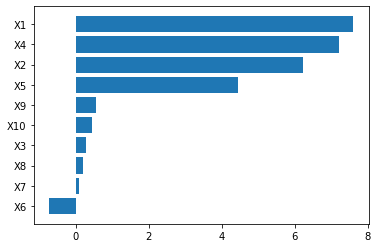

C:\Users\User\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\User\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
C:\Users\User\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the fut

Forward Pass
-----------------------------------------------------------------
iter  parent  var  knot  mse        terms  gcv     rsq    grsq   
-----------------------------------------------------------------
0     -       -    -     24.384601  1      24.630  0.000  0.000  
1     0       0    4     17.602823  3      18.708  0.278  0.240  
2     0       3    -1    11.462047  4      12.502  0.530  0.492  
3     0       1    93    6.222422   6      7.156   0.745  0.709  
4     0       4    -1    4.292658   7      5.072   0.824  0.794  
5     0       2    112   2.430135   9      3.034   0.900  0.877  
6     0       8    21    2.300447   11     3.039   0.906  0.877  
7     0       0    141   2.202471   13     3.085   0.910  0.875  
8     0       2    146   2.135113   15     3.175   0.912  0.871  
9     0       2    65    2.006968   17     3.175   0.918  0.871  
10    0       5    -1    1.948875   18     3.183   0.920  0.871  
11    0       5    83    1.891977   20     3.297   0.922  0.866

In [2]:
import pandas as pd
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from pyearth import Earth
from sklearn.model_selection import cross_val_score



df_train = pd.read_csv("trainingData.csv")

df_train




train_x=[]
for i in range(0,200):
    train_x.append(np.array([df_train.loc[i,"x.X1"],df_train.loc[i,"x.X2"],df_train.loc[i,"x.X3"],df_train.loc[i,"x.X4"],df_train.loc[i,"x.X5"],df_train.loc[i,"x.X6"],df_train.loc[i,"x.X7"],df_train.loc[i,"x.X8"],df_train.loc[i,"x.X9"],df_train.loc[i,"x.X10"]]))

train_y = df_train["y"]

len(train_x)
len(train_y)

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

regressor = SVR(kernel='linear')
regressor.fit(train_x,train_y)
reg_train = regressor.predict(train_x)




print("SVR Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(train_y, reg_train)))

regressor.coef_[0]
out=f_importances(regressor.coef_[0], ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10'])


model = Earth(feature_importance_type=('rss', 'gcv', 'nb_subsets'))
model.fit(train_x,train_y)

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train_x, train_y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

rmse_cv(model).mean()


print(model.trace())

print(model.summary_feature_importances(sort_by='gcv'))


## Problem 8.1

In [5]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
import sys

def build_model(df_train,model):
    train_x=[]
    df_importances = pd.DataFrame(columns=["Feature","Importance"])
    for i in range(0,200):
        if(len(df_train.columns)==11):
            train_x.append(np.array([df_train.loc[i,"V1"],df_train.loc[i,"V2"],df_train.loc[i,"V3"],df_train.loc[i,"V4"],df_train.loc[i,"V5"],df_train.loc[i,"V6"],df_train.loc[i,"V7"],df_train.loc[i,"V8"],df_train.loc[i,"V9"],df_train.loc[i,"V10"]]))
            df_importances.Feature=["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10"]
        else:
            train_x.append(np.array([df_train.loc[i,"V1"],df_train.loc[i,"V2"],df_train.loc[i,"V3"],df_train.loc[i,"V4"],df_train.loc[i,"V5"],df_train.loc[i,"V6"],df_train.loc[i,"V7"],df_train.loc[i,"V8"],df_train.loc[i,"V9"],df_train.loc[i,"V10"],df_train.loc[i,"V11"]]))
            df_importances.Feature=["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11"]
    train_y = df_train["y"]
    if(model=="RF"):
        rf = RandomForestRegressor(n_estimators = 200, random_state = 0)
        rf.fit(train_x, train_y)
        imp_out = rf.feature_importances_
    elif(model=="GBM"):
        rf = tree.DecisionTreeRegressor()
        rf.fit(train_x, train_y)
        imp_out = rf.feature_importances_
    elif(model=="DT"):
       model = GradientBoostingRegressor(max_depth=1)
       model.fit(train_x,train_y)
       imp_out=model.feature_importances_
    else:
         print("Not a Valid Model")
         sys.exit()
          
    imp_list=[]
    for i in range(0,len(imp_out)):
        imp_list.append(imp_out[i])

    df_importances.Importance=imp_list
    return(df_importances)



df_train = pd.read_csv("simulated.csv")
importance_p1 = build_model(df_train,"RF")
importance_p1

random_variable=list(np.random.normal(2, 4, 200)*0.1)
new_col = []
old_col = df_train["V1"]
for x in range(0,200):
    new_col.append(old_col[x]+random_variable[x])

df_train["V11"] = new_col

importance_p2 = build_model(df_train,"RF")
print("RANDOM FOREST IMPORTANCE OUTPUT")
print(importance_p2)

importance_gbm = build_model(df_train,"GBM")
print("GBM MODEL IMPORTANCE OUTPUT")
print(importance_gbm )

importance_dt = build_model(df_train,"DT")
print("DECISION TREE IMPORTANCE OUTPUT")
print(importance_dt )

RANDOM FOREST IMPORTANCE OUTPUT
   Feature  Importance
0       V1    0.286684
1       V2    0.222619
2       V3    0.039609
3       V4    0.260344
4       V5    0.085322
5       V6    0.021155
6       V7    0.020506
7       V8    0.013274
8       V9    0.012778
9      V10    0.020197
10     V11    0.017512
GBM MODEL IMPORTANCE OUTPUT
   Feature  Importance
0       V1    0.290042
1       V2    0.291979
2       V3    0.044090
3       V4    0.237775
4       V5    0.062706
5       V6    0.011574
6       V7    0.016771
7       V8    0.005066
8       V9    0.003752
9      V10    0.020172
10     V11    0.016073
DECISION TREE IMPORTANCE OUTPUT
   Feature  Importance
0       V1    0.293014
1       V2    0.245595
2       V3    0.061552
3       V4    0.308648
4       V5    0.091190
5       V6    0.000000
6       V7    0.000000
7       V8    0.000000
8       V9    0.000000
9      V10    0.000000
10     V11    0.000000


## Problem 8.2

Feature: 0, Score: 0.01023
Feature: 1, Score: 0.98977


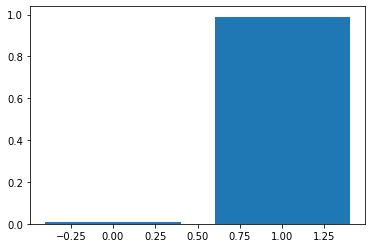

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jul  7 22:31:42 2021

@author: User
"""

import random
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from matplotlib import pyplot

random.seed(755)

x = np.array([1,2])
X_low=list(np.repeat(x, 300, axis=0))
X_low
X_high=list(np.random.normal(2, 4, 600))
X_high
X = list()
Y = list()

for x in range(0,600):
    Y.append(X_low[x] + X_high[x])
    X.append(np.array([X_low[x],X_high[x]]))

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, Y)

# get importance
importance = clf.feature_importances_
# summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Problem 8.3

In [10]:
# gradient boosting for regression in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from matplotlib import pyplot
import pandas as pd


X=pd.read_csv('solTrainXtrans.csv') 
y=pd.read_csv('solTrainY.csv') 
X_matrix = np.array(X)
y = np.array(y)
X_matrix
len(y)
X
y
model = GradientBoostingRegressor(max_depth=1)
model.fit(X_matrix, y)


# get importance
importance = model.feature_importances_
# summarize feature importance

df = pd.DataFrame(columns=['feature','importance'])
cols=X.columns[1:229]
cols
rows_list = []
for i,v in enumerate(importance):
    dic1={}
    feature_res=cols[i-1]
    importance_res=v
    dic1.update({'feature':feature_res,'importance':v})
    rows_list.append(dic1)
df=df.append(rows_list)

    
df_result_1=df.sort_values(by='importance', ascending=False).head(10)


model = GradientBoostingRegressor(max_depth=10)
model.fit(X_matrix, y)


# get importance
importance = model.feature_importances_
# summarize feature importance

df = pd.DataFrame(columns=['feature','importance'])
cols=X.columns[1:229]
cols
rows_list = []
for i,v in enumerate(importance):
    dic1={}
    feature_res=cols[i-1]
    importance_res=v
    dic1.update({'feature':feature_res,'importance':v})
    rows_list.append(dic1)
df=df.append(rows_list)
    
df_result_10=df.sort_values(by='importance', ascending=False).head(10)

print("Importance for Interaction Depth = 1")
print(df_result_1    )
print("Importance for Interaction Depth = 10")
print(df_result_10    )


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Importance for Interaction Depth = 1
               feature  importance
219          NumCarbon    0.298746
0         SurfaceArea2    0.200081
209          MolWeight    0.140153
228       SurfaceArea2    0.111085
223        NumChlorine    0.078732
217   NumAromaticBonds    0.069416
227       SurfaceArea1    0.022801
226  HydrophilicFactor    0.021351
172              FP172    0.015762
44               FP044    0.007473
Importance for Interaction Depth = 10
               feature  importance
219          NumCarbon    0.373211
0         SurfaceArea2    0.269949
228       SurfaceArea2    0.149564
209          MolWeight    0.072544
226  HydrophilicFactor    0.041144
211       NumNonHAtoms    0.033300
214       NumMultBonds    0.012246
212           NumBonds    0.009590
227       SurfaceArea1    0.007554
221          NumOxygen    0.005318


## Market Basket Analysis Problem 

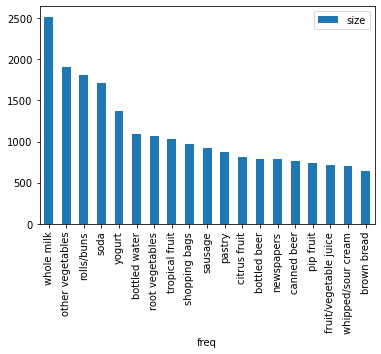

                       0               1     2             0  \
1840  whipped/sour cream  tropical fruit  None        yogurt   
335               liquor            None  None  bottled beer   
15                liquor            None  None  bottled beer   
1820     root vegetables       pip fruit  None    whole milk   
1848     root vegetables       pip fruit  None           nan   
1829     root vegetables  tropical fruit  None    whole milk   
1547     root vegetables    citrus fruit  None    whole milk   
1834  whipped/sour cream  tropical fruit  None    whole milk   
1502     root vegetables          butter  None    whole milk   
1842     root vegetables    citrus fruit  None           nan   

                     1                 2   support  confidence      lift  
1840        whole milk              None  0.004373    0.316176  5.642975  
335                nan              None  0.004678    0.422018  5.280062  
15                None              None  0.004678    0.422018  5.2533

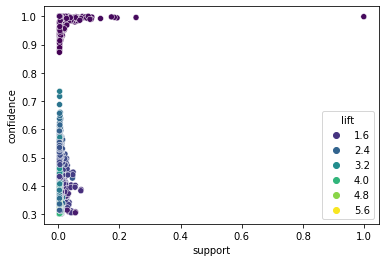

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import seaborn as sns

df = pd.read_csv("GroceryDataSet.csv")

transactions = []
for i in range(0, 9834):
    transactions.append([str(df.values[i,j]) for j in range(0, 23)])



df = pd.DataFrame({'freq': sum(transactions,[])})
df_freq=df.groupby('freq', as_index=False).size().sort_values(by="size",ascending=False).head(20).dropna()
df_freq=df_freq[df_freq['freq']!='nan']

df_freq.plot.bar(x='freq',y='size')

plt.show() 
    
rule_list = apriori(transactions, min_support = 0.004, min_confidence = 0.3)

results = list(rule_list)
df_results  = pd.DataFrame(results)
df_results.head()
support = df_results.support
len(results)

first_values = []
second_values = []
third_values = []
fourth_value = []

for i in range(df_results.shape[0]):
    single_list = df_results['ordered_statistics'][i][0]
    first_values.append(list(single_list[0]))
    second_values.append(list(single_list[1]))
    third_values.append(single_list[2])
    fourth_value.append(single_list[3])
    
lhs = pd.DataFrame(first_values)
rhs= pd.DataFrame(second_values)
confidence=pd.DataFrame(third_values,columns=['confidence'])
lift=pd.DataFrame(fourth_value,columns=['lift'])

df_final = pd.concat([lhs,rhs,support,confidence,lift], axis=1)
print(df_final.sort_values(by='lift', ascending=False).head(10))

scatter = sns.scatterplot(x="support", y="confidence",
                            hue="lift", # color dots by lift value
                            palette="viridis", # set colors
                            data=df_final)


